In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lmfit as lf
import os

from lmfit.models import DampedOscillatorModel

In [30]:
"""Import files from Folder"""


base = '/Volumes/Aleman-Lab/Group/Projects/GrapheneCoupledResonators/Data/Sample2/ResonanceCurves/'

path = os.path.join(base, 'Array0.101r0.35p1.4Device2.0Drum2/Data.csv')

Text(0.5,1,'Response Curve')

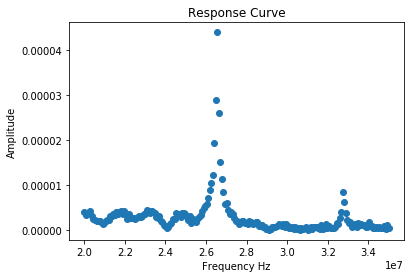

In [31]:
"""Define column names and plot response curve"""


colnames = ['SweepVal', 'F', 'R', 'theta', 'NEP_BW', 'R_ref', 'theta_ref', 'Amp', 'Phase']

df = pd.read_csv(path, names = colnames)

fig, ax = plt.subplots()
ax.plot(df.F, df.R, 'o')

ax.set_xlabel('Frequency Hz')
ax.set_ylabel('Amplitude')
ax.set_title('Response Curve')

In [32]:
"""Find resonant frequency and normalize F and R^2 values"""


maxR = df['R'].max()
maxFreqIn = (df['R'].idxmax())

df['Rnorm'] = (df.R) / (maxR)
df['Fnorm'] = df.F / 10**6

res = df['Fnorm'].values[maxFreqIn]

In [33]:
"""Define Model"""


model = DampedOscillatorModel()

model.param_names

['sigma', 'center', 'amplitude']

[[Model]]
    Model(damped_oscillator)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 61
    # data points      = 200
    # variables        = 3
    chi-square         = 0.27544777
    reduced chi-square = 0.00139821
    Akaike info crit   = -1311.53492
    Bayesian info crit = -1301.63997
[[Variables]]
    sigma:      0.00257234 +/- 1.5661e-04 (6.09%) (init = 0.0005)
    center:     26.5486192 +/- 0.00470797 (0.02%) (init = 26.55779)
    amplitude:  0.00504657 +/- 1.9500e-04 (3.86%) (init = 3.765374e-05)
    height:     0.98093044 +/- 0.03651769 (3.72%) == '0.5000000*amplitude/max(1.e-15, sigma)'
    fwhm:       0.23657494 +/- 0.01440961 (6.09%) == 'sqrt(abs(center**2*(1-2*sigma**2)+(2*sqrt(center**4*sigma**2*(sigma**2+3)))))-sqrt(abs(center**2*(1-2*sigma**2)-(2*sqrt(center**4*sigma**2*(sigma**2+3)))))'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amplitude) =  0.811
    C(sigma, center)    =  0.130



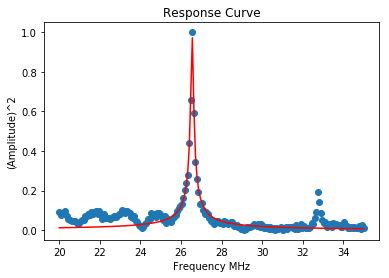

In [41]:
"""Fit data with Damped Oscillator Model"""


guessQ = 1000

params = model.make_params(sigma = 1/(2*guessQ), center = res, amplitude = 1 / (guessQ*res))

result = model.fit(df.Rnorm, params, x = df.Fnorm)

fig, ax = plt.subplots()
ax.plot(df.Fnorm, df.Rnorm, 'o', df.Fnorm, result.best_fit, 'r-')

ax.set_xlabel('Frequency MHz')
ax.set_ylabel('(Amplitude)^2')
ax.set_title('Response Curve')

print(result.fit_report())

In [42]:
"""Caluculate Quality Factor"""


Q = 1/(2*result.params['sigma'].value)

Q1 = result.params['center'].value/(result.params['fwhm'].value)

print(Q, Q1)

194.37548628018143 112.22075908641891


In [43]:
print (result.params['fwhm'].value, 2*result.params['sigma'].value)

0.23657493904606142 0.005144681662987871
